# Text Mining Final project


## Required Packages

In [57]:
import pandas as pd
import os
import scipy
from gensim import corpora, models
from gensim.matutils import Sparse2Corpus
from scipy.sparse import csr_matrix
import os
import re
import csv
import sys
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer
from nltk.corpus import stopwords
import spacy
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import pearsonr

## Importing data

In [58]:
# Change working directory
cwd = r"C:\Users\aleja\OneDrive\Escritorio\Term_2\Text_Mining\Text_mining_final_project"
os.chdir(cwd)

In [59]:
# Import CSV file
df = pd.read_csv("billboard_hot_100_1981_2022_with_lyrics_vf.csv", encoding='utf-8',encoding_errors='ignore')

# Display the first few rows
df

year  ranking                      title  \
0     1981        1           Bette Davis Eyes   
1     1981        2               Endless Love   
2     1981        3                       Lady   
3     1981        4  (Just Like) Starting Over   
4     1981        5              Jessie's Girl   
...    ...      ...                        ...   
4177  2022       96               Flower Shops   
4178  2022       97                To the Moon   
4179  2022       98                     Unholy   
4180  2022       99            One Mississippi   
4181  2022      100   Circles Around This Town   

                              artist  \
0                         Kim Carnes   
1         Diana Ross & Lionel Richie   
2                       Kenny Rogers   
3                        John Lennon   
4                   Rick Springfield   
...                              ...   
4177  Ernest featuring Morgan Wallen   
4178       Jnr Choi and Sam Tompkins   
4179        Sam Smith and Kim Petras   
4180                      Kane Brown   
4181                    Maren Morris   

                                                 lyrics  \
0     [Verse 1]\nHer hair is Harlow gold\nHer lips s...   
1     [Verse 1: Lionel Richie & Diana Ross]\nMy love...   
2     [Verse 1]\nLady\nI'm your knight in shining ar...   
3     [Intro]\nOur life together is so precious toge...   
4     [Verse 1]\nJessie is a friend\nYeah, I know, h...   
...                                                 ...   
4177  [Verse 1: ERNEST]\nIt's a beautiful day, she's...   
4178  [Intro: Sam Tompkins]\nSit by myself\nTalking ...   
4179  [Intro: Sam Smith & Kim Petras]\nMummy don't k...   
4180  [Verse 1]\nYou and I\nHad this off and on so l...   
4181  [Verse 1]\nI swear I don't know how I trusted\...   

                                               song_url  \
0     https://genius.com/kim-carnes-bette-davis-eyes...   
1     https://genius.com/diana-ross-and-lionel-richi...   
2           https://genius.com/kenny-rogers-lady-lyrics   
3     https://genius.com/john-lennon-just-like-start...   
4     https://genius.com/rick-springfield-jessies-gi...   
...                                                 ...   
4177      https://genius.com/ernest-flower-shops-lyrics   
4178  https://genius.com/jnr-choi-and-sam-tompkins-t...   
4179  https://genius.com/sam-smith-and-kim-petras-un...   
4180  https://genius.com/kane-brown-one-mississippi-...   
4181  https://genius.com/maren-morris-circles-around...   

                                              producers  \
0                                         ['Val Garay']   
1                                     ['Lionel Richie']   
2                                     ['Lionel Richie']   
3           ['Yoko Ono', 'John Lennon', 'Jack Douglas']   
4                                       ['Keith Olsen']   
...                                                 ...   
4177                                       ['Joey Moi']   
4178                                      ['Parked Up']   
4179  ['Sam Smith', 'ILYA', 'Jimmy Napes', 'Blake Sl...   
4180                                      ['Dann Huff']   
4181                                   ['Greg Kurstin']   

                                                writers  \
0                   ['Jackie DeShannon', 'Donna Weiss']   
1                                     ['Lionel Richie']   
2                                     ['Lionel Richie']   
3                           ['Yoko Ono', 'John Lennon']   
4                                  ['Rick Springfield']   
...                                                 ...   
4177           ['ERNEST', 'Mark Holman', 'Ben Burgess']   
4178  ['Philip Lawrence', 'Bruno Mars', 'Jeff Bhaske...   
4179  ['Omer Fedi', 'ILYA', 'Jimmy Napes', 'Blake Sl...   
4180  ['Levon Gray', 'ERNEST', 'Jesse Frasure', 'Kan...   
4181  ['Jimmy Robbins', 'Julia Michaels', 'Maren Mor...   

                                         label         released_on  \
0                 

In [60]:
# Drop rows with missing values in the 'lyrics' column only
df.dropna(subset=['lyrics'], inplace=True)

In [61]:
df

year  ranking                      title  \
0     1981        1           Bette Davis Eyes   
1     1981        2               Endless Love   
2     1981        3                       Lady   
3     1981        4  (Just Like) Starting Over   
4     1981        5              Jessie's Girl   
...    ...      ...                        ...   
4177  2022       96               Flower Shops   
4178  2022       97                To the Moon   
4179  2022       98                     Unholy   
4180  2022       99            One Mississippi   
4181  2022      100   Circles Around This Town   

                              artist  \
0                         Kim Carnes   
1         Diana Ross & Lionel Richie   
2                       Kenny Rogers   
3                        John Lennon   
4                   Rick Springfield   
...                              ...   
4177  Ernest featuring Morgan Wallen   
4178       Jnr Choi and Sam Tompkins   
4179        Sam Smith and Kim Petras   
4180                      Kane Brown   
4181                    Maren Morris   

                                                 lyrics  \
0     [Verse 1]\nHer hair is Harlow gold\nHer lips s...   
1     [Verse 1: Lionel Richie & Diana Ross]\nMy love...   
2     [Verse 1]\nLady\nI'm your knight in shining ar...   
3     [Intro]\nOur life together is so precious toge...   
4     [Verse 1]\nJessie is a friend\nYeah, I know, h...   
...                                                 ...   
4177  [Verse 1: ERNEST]\nIt's a beautiful day, she's...   
4178  [Intro: Sam Tompkins]\nSit by myself\nTalking ...   
4179  [Intro: Sam Smith & Kim Petras]\nMummy don't k...   
4180  [Verse 1]\nYou and I\nHad this off and on so l...   
4181  [Verse 1]\nI swear I don't know how I trusted\...   

                                               song_url  \
0     https://genius.com/kim-carnes-bette-davis-eyes...   
1     https://genius.com/diana-ross-and-lionel-richi...   
2           https://genius.com/kenny-rogers-lady-lyrics   
3     https://genius.com/john-lennon-just-like-start...   
4     https://genius.com/rick-springfield-jessies-gi...   
...                                                 ...   
4177      https://genius.com/ernest-flower-shops-lyrics   
4178  https://genius.com/jnr-choi-and-sam-tompkins-t...   
4179  https://genius.com/sam-smith-and-kim-petras-un...   
4180  https://genius.com/kane-brown-one-mississippi-...   
4181  https://genius.com/maren-morris-circles-around...   

                                              producers  \
0                                         ['Val Garay']   
1                                     ['Lionel Richie']   
2                                     ['Lionel Richie']   
3           ['Yoko Ono', 'John Lennon', 'Jack Douglas']   
4                                       ['Keith Olsen']   
...                                                 ...   
4177                                       ['Joey Moi']   
4178                                      ['Parked Up']   
4179  ['Sam Smith', 'ILYA', 'Jimmy Napes', 'Blake Sl...   
4180                                      ['Dann Huff']   
4181                                   ['Greg Kurstin']   

                                                writers  \
0                   ['Jackie DeShannon', 'Donna Weiss']   
1                                     ['Lionel Richie']   
2                                     ['Lionel Richie']   
3                           ['Yoko Ono', 'John Lennon']   
4                                  ['Rick Springfield']   
...                                                 ...   
4177           ['ERNEST', 'Mark Holman', 'Ben Burgess']   
4178  ['Philip Lawrence', 'Bruno Mars', 'Jeff Bhaske...   
4179  ['Omer Fedi', 'ILYA', 'Jimmy Napes', 'Blake Sl...   
4180  ['Levon Gray', 'ERNEST', 'Jesse Frasure', 'Kan...   
4181  ['Jimmy Robbins', 'Julia Michaels', 'Maren Mor...   

                                         label         released_on  \
0                 

## Preprocessing text and Wordcloud

In [62]:
# Function to download NLTK resources
def download_nltk_resources():
    required_resources = ['wordnet', 'stopwords', 'punkt']
    for resource in required_resources:
        try:
            nltk.data.find(f'tokenizers/{resource}' if resource == 'punkt' else f'corpora/{resource}')
        except LookupError:
            nltk.download(resource)

download_nltk_resources()

# Function to install and load spaCy model
def install_spacy_model(model_name):
    try:
        return spacy.load(model_name)
    except OSError:
        print(f"Downloading spaCy model: {model_name}")
        subprocess.check_call([sys.executable, "-m", "spacy", "download", model_name])
        return spacy.load(model_name)

sp = install_spacy_model('en_core_web_sm')

# Enable tqdm for pandas
tqdm.pandas()

# Initialize stemmers and lemmatizer
porter = SnowballStemmer("english")
lmtzr = WordNetLemmatizer()
STOP_WORDS = set(stopwords.words('english'))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:

def preprocess_lower(text):
    """
    Preprocess text by:
       - Converting to lowercase.
       - Removing punctuation.
       - Tokenizing.
       - Removing stopwords.
    
    Returns:
        str: A string of filtered tokens separated by spaces.
    """
    text_lower = text.lower()
    text_no_punct = re.sub(r'[^\w\s]', '', text_lower)
    tokens = word_tokenize(text_no_punct)
    filtered_tokens = [token for token in tokens if token not in STOP_WORDS]
    return " ".join(filtered_tokens)

def preprocess_stem(text):
    """
    Preprocess text by performing all steps in preprocess_lower() and then applying stemming.
    
    Returns:
        str: A string of stemmed tokens separated by spaces.
    """
    tokens = preprocess_lower(text).split()
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

def preprocess_lemma(text):
    """
    Preprocess text by:
       - Removing punctuation and stopwords using spaCy's token attributes.
       - Lemmatizing the text.
       - (Note: This function does NOT lowercase the text.)
    
    Returns:
        str: A string of lemmatized tokens separated by spaces.
    """
    doc = sp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.lemma_.strip() != '']
    return " ".join(lemmatized_tokens)

def tokenize(text, mode=0):
    """
    General tokenize function. Always applies punctuation and stopword removal and then:
    
      mode = 0: Applies lowercasing.
      mode = 1: Applies lowercasing and stemming.
      mode = 2: Applies lemmatization (without lowercasing the original text).
    
    Args:
        text (str): The input text to be processed.
        mode (int): Processing mode (0 for lowercasing; 1 for stemming; 2 for lemmatizing).

    Returns:
        str: A string of processed tokens separated by spaces.

    Raises:
        ValueError: If an invalid mode is provided.
    """
    if mode == 0:
        return preprocess_lower(text)
    elif mode == 1:
        return preprocess_stem(text)
    elif mode == 2:
        return preprocess_lemma(text)
    else:
        raise ValueError("Invalid mode. Please use 0 for lowercasing, 1 for stemming, or 2 for lemmatizing.")

In [64]:
corpus_data = df.copy()

In [65]:
corpus_data

year  ranking                      title  \
0     1981        1           Bette Davis Eyes   
1     1981        2               Endless Love   
2     1981        3                       Lady   
3     1981        4  (Just Like) Starting Over   
4     1981        5              Jessie's Girl   
...    ...      ...                        ...   
4177  2022       96               Flower Shops   
4178  2022       97                To the Moon   
4179  2022       98                     Unholy   
4180  2022       99            One Mississippi   
4181  2022      100   Circles Around This Town   

                              artist  \
0                         Kim Carnes   
1         Diana Ross & Lionel Richie   
2                       Kenny Rogers   
3                        John Lennon   
4                   Rick Springfield   
...                              ...   
4177  Ernest featuring Morgan Wallen   
4178       Jnr Choi and Sam Tompkins   
4179        Sam Smith and Kim Petras   
4180                      Kane Brown   
4181                    Maren Morris   

                                                 lyrics  \
0     [Verse 1]\nHer hair is Harlow gold\nHer lips s...   
1     [Verse 1: Lionel Richie & Diana Ross]\nMy love...   
2     [Verse 1]\nLady\nI'm your knight in shining ar...   
3     [Intro]\nOur life together is so precious toge...   
4     [Verse 1]\nJessie is a friend\nYeah, I know, h...   
...                                                 ...   
4177  [Verse 1: ERNEST]\nIt's a beautiful day, she's...   
4178  [Intro: Sam Tompkins]\nSit by myself\nTalking ...   
4179  [Intro: Sam Smith & Kim Petras]\nMummy don't k...   
4180  [Verse 1]\nYou and I\nHad this off and on so l...   
4181  [Verse 1]\nI swear I don't know how I trusted\...   

                                               song_url  \
0     https://genius.com/kim-carnes-bette-davis-eyes...   
1     https://genius.com/diana-ross-and-lionel-richi...   
2           https://genius.com/kenny-rogers-lady-lyrics   
3     https://genius.com/john-lennon-just-like-start...   
4     https://genius.com/rick-springfield-jessies-gi...   
...                                                 ...   
4177      https://genius.com/ernest-flower-shops-lyrics   
4178  https://genius.com/jnr-choi-and-sam-tompkins-t...   
4179  https://genius.com/sam-smith-and-kim-petras-un...   
4180  https://genius.com/kane-brown-one-mississippi-...   
4181  https://genius.com/maren-morris-circles-around...   

                                              producers  \
0                                         ['Val Garay']   
1                                     ['Lionel Richie']   
2                                     ['Lionel Richie']   
3           ['Yoko Ono', 'John Lennon', 'Jack Douglas']   
4                                       ['Keith Olsen']   
...                                                 ...   
4177                                       ['Joey Moi']   
4178                                      ['Parked Up']   
4179  ['Sam Smith', 'ILYA', 'Jimmy Napes', 'Blake Sl...   
4180                                      ['Dann Huff']   
4181                                   ['Greg Kurstin']   

                                                writers  \
0                   ['Jackie DeShannon', 'Donna Weiss']   
1                                     ['Lionel Richie']   
2                                     ['Lionel Richie']   
3                           ['Yoko Ono', 'John Lennon']   
4                                  ['Rick Springfield']   
...                                                 ...   
4177           ['ERNEST', 'Mark Holman', 'Ben Burgess']   
4178  ['Philip Lawrence', 'Bruno Mars', 'Jeff Bhaske...   
4179  ['Omer Fedi', 'ILYA', 'Jimmy Napes', 'Blake Sl...   
4180  ['Levon Gray', 'ERNEST', 'Jesse Frasure', 'Kan...   
4181  ['Jimmy Robbins', 'Julia Michaels', 'Maren Mor...   

                                         label         released_on  \
0                 

In [66]:
mod = 2

# Pre-process the text column with progress tracking
try:
    corpus_data["text_preproc"] = corpus_data.lyrics.astype(str).progress_apply(lambda row: tokenize(row, mod))
    print("Done processing text.")
except Exception as e:
    print(f"Error processing text column: {e}")
    sys.exit(1)

100%|██████████| 4154/4154 [01:44<00:00, 39.84it/s]

Done processing text.


In [67]:
corpus_data

year  ranking                      title  \
0     1981        1           Bette Davis Eyes   
1     1981        2               Endless Love   
2     1981        3                       Lady   
3     1981        4  (Just Like) Starting Over   
4     1981        5              Jessie's Girl   
...    ...      ...                        ...   
4177  2022       96               Flower Shops   
4178  2022       97                To the Moon   
4179  2022       98                     Unholy   
4180  2022       99            One Mississippi   
4181  2022      100   Circles Around This Town   

                              artist  \
0                         Kim Carnes   
1         Diana Ross & Lionel Richie   
2                       Kenny Rogers   
3                        John Lennon   
4                   Rick Springfield   
...                              ...   
4177  Ernest featuring Morgan Wallen   
4178       Jnr Choi and Sam Tompkins   
4179        Sam Smith and Kim Petras   
4180                      Kane Brown   
4181                    Maren Morris   

                                                 lyrics  \
0     [Verse 1]\nHer hair is Harlow gold\nHer lips s...   
1     [Verse 1: Lionel Richie & Diana Ross]\nMy love...   
2     [Verse 1]\nLady\nI'm your knight in shining ar...   
3     [Intro]\nOur life together is so precious toge...   
4     [Verse 1]\nJessie is a friend\nYeah, I know, h...   
...                                                 ...   
4177  [Verse 1: ERNEST]\nIt's a beautiful day, she's...   
4178  [Intro: Sam Tompkins]\nSit by myself\nTalking ...   
4179  [Intro: Sam Smith & Kim Petras]\nMummy don't k...   
4180  [Verse 1]\nYou and I\nHad this off and on so l...   
4181  [Verse 1]\nI swear I don't know how I trusted\...   

                                               song_url  \
0     https://genius.com/kim-carnes-bette-davis-eyes...   
1     https://genius.com/diana-ross-and-lionel-richi...   
2           https://genius.com/kenny-rogers-lady-lyrics   
3     https://genius.com/john-lennon-just-like-start...   
4     https://genius.com/rick-springfield-jessies-gi...   
...                                                 ...   
4177      https://genius.com/ernest-flower-shops-lyrics   
4178  https://genius.com/jnr-choi-and-sam-tompkins-t...   
4179  https://genius.com/sam-smith-and-kim-petras-un...   
4180  https://genius.com/kane-brown-one-mississippi-...   
4181  https://genius.com/maren-morris-circles-around...   

                                              producers  \
0                                         ['Val Garay']   
1                                     ['Lionel Richie']   
2                                     ['Lionel Richie']   
3           ['Yoko Ono', 'John Lennon', 'Jack Douglas']   
4                                       ['Keith Olsen']   
...                                                 ...   
4177                                       ['Joey Moi']   
4178                                      ['Parked Up']   
4179  ['Sam Smith', 'ILYA', 'Jimmy Napes', 'Blake Sl...   
4180                                      ['Dann Huff']   
4181                                   ['Greg Kurstin']   

                                                writers  \
0                   ['Jackie DeShannon', 'Donna Weiss']   
1                                     ['Lionel Richie']   
2                                     ['Lionel Richie']   
3                           ['Yoko Ono', 'John Lennon']   
4                                  ['Rick Springfield']   
...                                                 ...   
4177           ['ERNEST', 'Mark Holman', 'Ben Burgess']   
4178  ['Philip Lawrence', 'Bruno Mars', 'Jeff Bhaske...   
4179  ['Omer Fedi', 'ILYA', 'Jimmy Napes', 'Blake Sl...   
4180  ['Levon Gray', 'ERNEST', 'Jesse Frasure', 'Kan...   
4181  ['Jimmy Robbins', 'Julia Michaels', 'Maren Mor...   

                                         label         released_on  \
0                 

In [68]:
# Define the cleaning function
def clean_lyrics(text):
    if isinstance(text, str):
        # Remove square brackets and parentheses content
        text = re.sub(r'\[.*?\]', '', text)
        text = re.sub(r'\(.*?\)', '', text)
        # Replace newline characters with space
        text = text.replace('\n', ' ')
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    else:
        return text

# Apply to the 'lyrics' column
corpus_data['lyrics'] = corpus_data['lyrics'].apply(clean_lyrics)


In [69]:
corpus_data

year  ranking                      title  \
0     1981        1           Bette Davis Eyes   
1     1981        2               Endless Love   
2     1981        3                       Lady   
3     1981        4  (Just Like) Starting Over   
4     1981        5              Jessie's Girl   
...    ...      ...                        ...   
4177  2022       96               Flower Shops   
4178  2022       97                To the Moon   
4179  2022       98                     Unholy   
4180  2022       99            One Mississippi   
4181  2022      100   Circles Around This Town   

                              artist  \
0                         Kim Carnes   
1         Diana Ross & Lionel Richie   
2                       Kenny Rogers   
3                        John Lennon   
4                   Rick Springfield   
...                              ...   
4177  Ernest featuring Morgan Wallen   
4178       Jnr Choi and Sam Tompkins   
4179        Sam Smith and Kim Petras   
4180                      Kane Brown   
4181                    Maren Morris   

                                                 lyrics  \
0     Her hair is Harlow gold Her lips sweet surpris...   
1     My love There's only you in my life The only t...   
2     Lady I'm your knight in shining armor And I lo...   
3     Our life together is so precious together We h...   
4     Jessie is a friend Yeah, I know, he's been a g...   
...                                                 ...   
4177  It's a beautiful day, she's been cryin' all ni...   
4178  Sit by myself Talking to the moon Teh, ha, pul...   
4179  Mummy don't know Daddy's getting hot At the Bo...   
4180  You and I Had this off and on so long You've b...   
4181  I swear I don't know how I trusted A Montero w...   

                                               song_url  \
0     https://genius.com/kim-carnes-bette-davis-eyes...   
1     https://genius.com/diana-ross-and-lionel-richi...   
2           https://genius.com/kenny-rogers-lady-lyrics   
3     https://genius.com/john-lennon-just-like-start...   
4     https://genius.com/rick-springfield-jessies-gi...   
...                                                 ...   
4177      https://genius.com/ernest-flower-shops-lyrics   
4178  https://genius.com/jnr-choi-and-sam-tompkins-t...   
4179  https://genius.com/sam-smith-and-kim-petras-un...   
4180  https://genius.com/kane-brown-one-mississippi-...   
4181  https://genius.com/maren-morris-circles-around...   

                                              producers  \
0                                         ['Val Garay']   
1                                     ['Lionel Richie']   
2                                     ['Lionel Richie']   
3           ['Yoko Ono', 'John Lennon', 'Jack Douglas']   
4                                       ['Keith Olsen']   
...                                                 ...   
4177                                       ['Joey Moi']   
4178                                      ['Parked Up']   
4179  ['Sam Smith', 'ILYA', 'Jimmy Napes', 'Blake Sl...   
4180                                      ['Dann Huff']   
4181                                   ['Greg Kurstin']   

                                                writers  \
0                   ['Jackie DeShannon', 'Donna Weiss']   
1                                     ['Lionel Richie']   
2                                     ['Lionel Richie']   
3                           ['Yoko Ono', 'John Lennon']   
4                                  ['Rick Springfield']   
...                                                 ...   
4177           ['ERNEST', 'Mark Holman', 'Ben Burgess']   
4178  ['Philip Lawrence', 'Bruno Mars', 'Jeff Bhaske...   
4179  ['Omer Fedi', 'ILYA', 'Jimmy Napes', 'Blake Sl...   
4180  ['Levon Gray', 'ERNEST', 'Jesse Frasure', 'Kan...   
4181  ['Jimmy Robbins', 'Julia Michaels', 'Maren Mor...   

                                         label         released_on  \
0                 

In [70]:
# Define custom stopwords (case-insensitive)
custom_stopwords_list = ["verse", "chorus", "prechorus", "dont", "na", "im", "youre", "ive", "la", "oh", "da", "ta", "ody",
                         "ayy", "ah", "ohoh", "yeah", "m", "s", "1", "2", "ooh", "doo", "know", "woah", "ha", "wop", "duh",
                         "ooo","dey", "sa", "woo", "ugh", "ho", "ou", "ud", "de", "eh", "mmm", "ba", "yo", "hey", "ay", "ya",
                         "te", "uh", "ding", "dong", "hmm", "mmmm"] 
custom_stopwords = set(STOPWORDS).union(set(word.lower() for word in custom_stopwords_list))

# Convert text_preproc column to lowercase
corpus_data['text_preproc'] = corpus_data['text_preproc'].apply(lambda x: str(x).lower())

# **Step 1: Remove stopwords from the entire corpus before generating word clouds**
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in custom_stopwords]
    return " ".join(filtered_words)

# Apply stopword removal to the entire column
corpus_data['text_preproc'] = corpus_data['text_preproc'].apply(remove_stopwords)

## LDA Pipeline

In [71]:
corpus_data

year  ranking                      title  \
0     1981        1           Bette Davis Eyes   
1     1981        2               Endless Love   
2     1981        3                       Lady   
3     1981        4  (Just Like) Starting Over   
4     1981        5              Jessie's Girl   
...    ...      ...                        ...   
4177  2022       96               Flower Shops   
4178  2022       97                To the Moon   
4179  2022       98                     Unholy   
4180  2022       99            One Mississippi   
4181  2022      100   Circles Around This Town   

                              artist  \
0                         Kim Carnes   
1         Diana Ross & Lionel Richie   
2                       Kenny Rogers   
3                        John Lennon   
4                   Rick Springfield   
...                              ...   
4177  Ernest featuring Morgan Wallen   
4178       Jnr Choi and Sam Tompkins   
4179        Sam Smith and Kim Petras   
4180                      Kane Brown   
4181                    Maren Morris   

                                                 lyrics  \
0     Her hair is Harlow gold Her lips sweet surpris...   
1     My love There's only you in my life The only t...   
2     Lady I'm your knight in shining armor And I lo...   
3     Our life together is so precious together We h...   
4     Jessie is a friend Yeah, I know, he's been a g...   
...                                                 ...   
4177  It's a beautiful day, she's been cryin' all ni...   
4178  Sit by myself Talking to the moon Teh, ha, pul...   
4179  Mummy don't know Daddy's getting hot At the Bo...   
4180  You and I Had this off and on so long You've b...   
4181  I swear I don't know how I trusted A Montero w...   

                                               song_url  \
0     https://genius.com/kim-carnes-bette-davis-eyes...   
1     https://genius.com/diana-ross-and-lionel-richi...   
2           https://genius.com/kenny-rogers-lady-lyrics   
3     https://genius.com/john-lennon-just-like-start...   
4     https://genius.com/rick-springfield-jessies-gi...   
...                                                 ...   
4177      https://genius.com/ernest-flower-shops-lyrics   
4178  https://genius.com/jnr-choi-and-sam-tompkins-t...   
4179  https://genius.com/sam-smith-and-kim-petras-un...   
4180  https://genius.com/kane-brown-one-mississippi-...   
4181  https://genius.com/maren-morris-circles-around...   

                                              producers  \
0                                         ['Val Garay']   
1                                     ['Lionel Richie']   
2                                     ['Lionel Richie']   
3           ['Yoko Ono', 'John Lennon', 'Jack Douglas']   
4                                       ['Keith Olsen']   
...                                                 ...   
4177                                       ['Joey Moi']   
4178                                      ['Parked Up']   
4179  ['Sam Smith', 'ILYA', 'Jimmy Napes', 'Blake Sl...   
4180                                      ['Dann Huff']   
4181                                   ['Greg Kurstin']   

                                                writers  \
0                   ['Jackie DeShannon', 'Donna Weiss']   
1                                     ['Lionel Richie']   
2                                     ['Lionel Richie']   
3                           ['Yoko Ono', 'John Lennon']   
4                                  ['Rick Springfield']   
...                                                 ...   
4177           ['ERNEST', 'Mark Holman', 'Ben Burgess']   
4178  ['Philip Lawrence', 'Bruno Mars', 'Jeff Bhaske...   
4179  ['Omer Fedi', 'ILYA', 'Jimmy Napes', 'Blake Sl...   
4180  ['Levon Gray', 'ERNEST', 'Jesse Frasure', 'Kan...   
4181  ['Jimmy Robbins', 'Julia Michaels', 'Maren Mor...   

                                         label         released_on  \
0                 

In [72]:
# Creating DTM
cv = CountVectorizer(ngram_range = (1,2), lowercase=False, max_df=0.9)
cv.fit(corpus_data.text_preproc)
vectorized_text=cv.transform(corpus_data.text_preproc)
vectorized_text=vectorized_text.toarray()
print("document term matrix has size", vectorized_text.shape)

document term matrix has size (4154, 158881)


In [73]:
# Using Gensim LDA
#gensim needs the dtm in a different sparce format
dtm_sparse = csr_matrix(vectorized_text)

# Convert sparse matrix to gensim corpus
corpus = Sparse2Corpus(dtm_sparse, documents_columns=False)

# Create gensim dictionary from sklearn CountVectorizer vocabulary
vocabulary_gensim = {}
for key, val in cv.vocabulary_.items():
    vocabulary_gensim[val] = key

dictionary = corpora.Dictionary()
dictionary.id2token = vocabulary_gensim
dictionary.token2id = cv.vocabulary_

# Number of topics
num_topics = 10

# Build LDA model
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

# Display the topics
topics = lda_model.print_topics(num_words=50)
for topic in topics:
    print(topic)
    print("    ")

# Using get_document_topics with an explicit minimum_probability
doc_topics = [lda_model.get_document_topics(item, minimum_probability=0.0000001) for item in corpus]

#note you could also use this vector = [lda[item] for item in corpus] but this has a higher threshold. 
#I like my topic vectors complete!

print(corpus_data.text_preproc[10])
print("  ")
#this produces a lits of tuples
print(doc_topics[10])

topics = lda_model.show_topics(num_topics=-1, num_words=50, formatted=False)


(0, '0.019*"love" + 0.011*"baby" + 0.011*"want" + 0.010*"time" + 0.009*"feel" + 0.009*"wanna" + 0.009*"come" + 0.009*"need" + 0.008*"tell" + 0.008*"let" + 0.008*"go" + 0.007*"way" + 0.007*"cause" + 0.007*"night" + 0.006*"pre" + 0.005*"think" + 0.005*"leave" + 0.005*"life" + 0.005*"right" + 0.005*"heart" + 0.005*"day" + 0.005*"thing" + 0.005*"girl" + 0.004*"eye" + 0.004*"away" + 0.004*"will" + 0.004*"intro" + 0.004*"hold" + 0.004*"good" + 0.003*"say" + 0.003*"mind" + 0.003*"find" + 0.003*"wish" + 0.003*"try" + 0.003*"wait" + 0.003*"turn" + 0.003*"look" + 0.003*"stay" + 0.003*"man" + 0.003*"world" + 0.003*"long" + 0.003*"tonight" + 0.002*"body" + 0.002*"run" + 0.002*"hear" + 0.002*"hand" + 0.002*"lose" + 0.002*"fall" + 0.002*"dance" + 0.002*"well"')
    
(1, '0.010*"bitch" + 0.009*"shit" + 0.008*"nigga" + 0.007*"fuck" + 0.005*"lil" + 0.005*"niggas" + 0.005*"intro" + 0.005*"gon" + 0.004*"ass" + 0.004*"come" + 0.004*"body" + 0.004*"party party" + 0.004*"huh" + 0.004*"gang" + 0.003*"let" + 

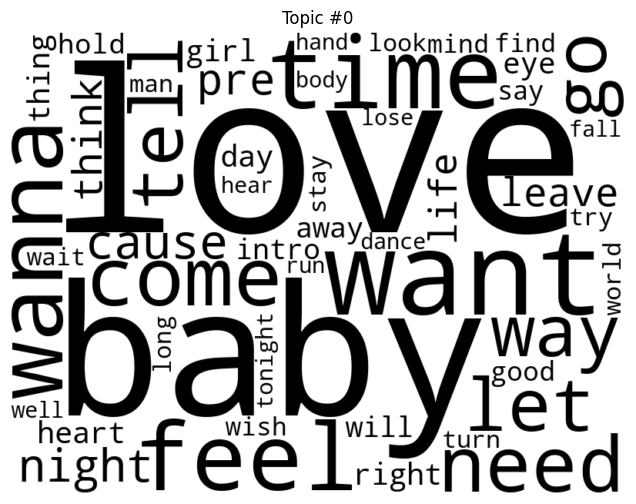

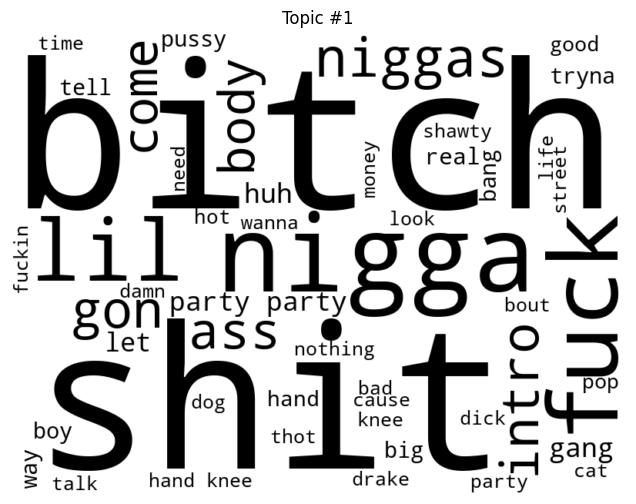

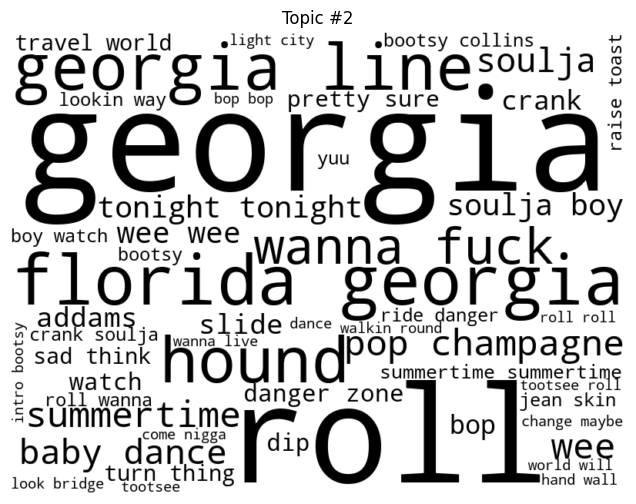

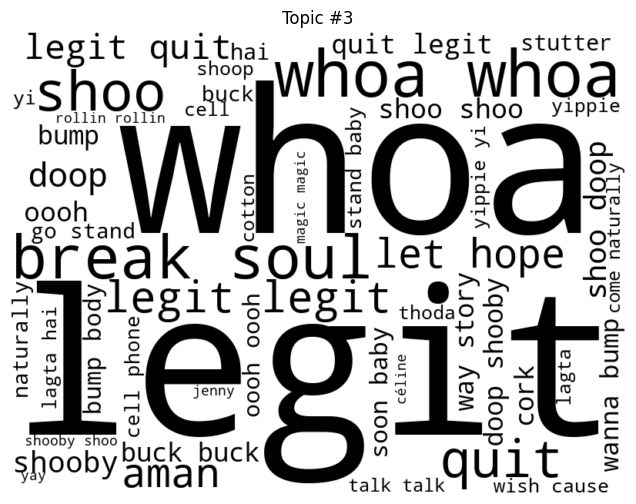

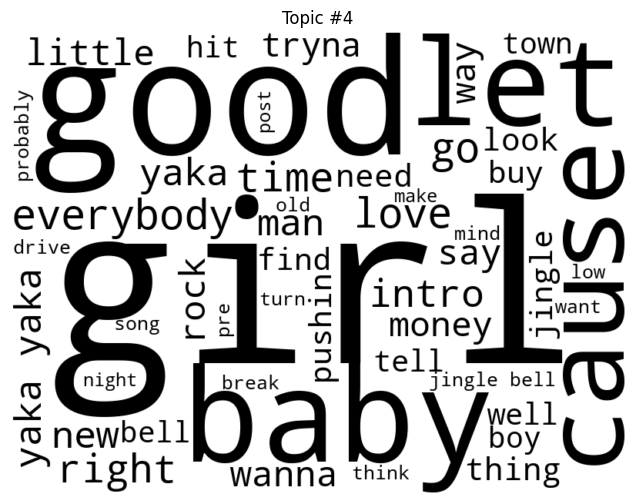

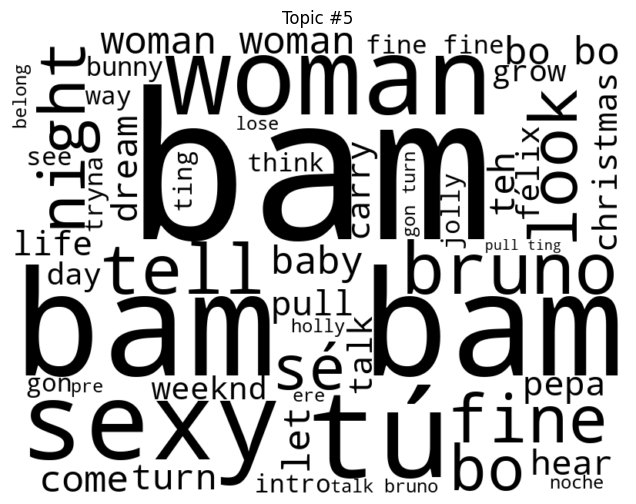

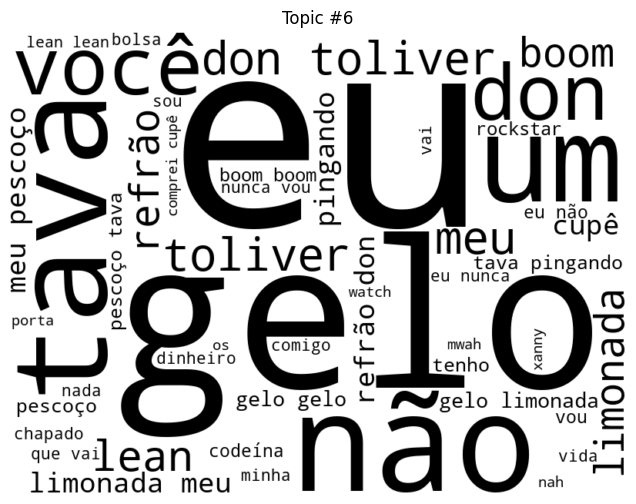

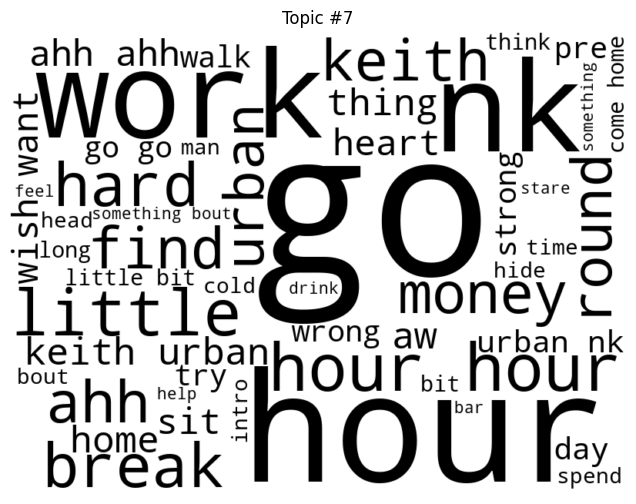

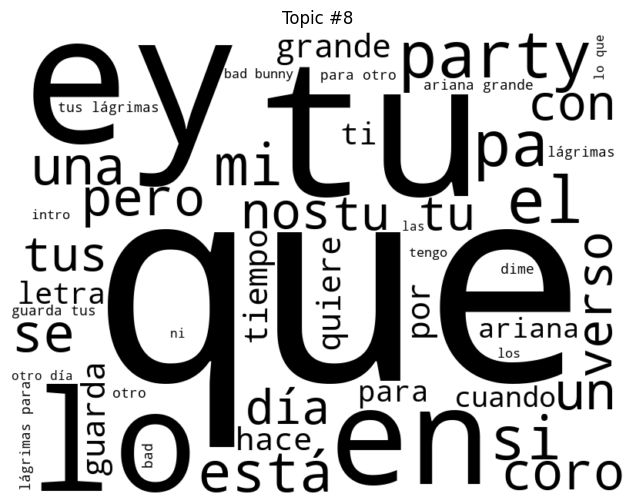

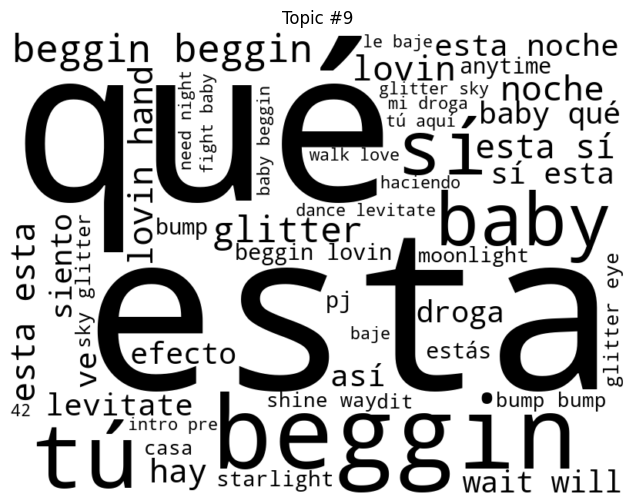

In [74]:
from wordcloud import WordCloud

def generate_wordclouds(topics, dictionary):
    for topic_num, topic_words in topics:
        word_freq = dict(topic_words)
        wordcloud = WordCloud(
            width = 800,
            height = 600,
            background_color ='white',
            color_func=lambda *args, **kwargs: "black", # Ensures words are in black
            min_font_size = 10).generate_from_frequencies(word_freq)
        
        plt.figure(figsize = (8, 6), facecolor = None)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f'Topic #{topic_num}')
        plt.show()

# Generate word clouds for each topic
generate_wordclouds(topics, lda_model.id2word)


### Language detection

In [89]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
import pandas as pd

# Ensure consistent language detection results
DetectorFactory.seed = 42


# Function to detect language safely
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Apply language detection
corpus_data['detected_language'] = corpus_data['lyrics'].apply(detect_language)

# Filter to keep only rows where detected language is English
corpus_data = corpus_data[corpus_data['detected_language'] == 'en'].reset_index(drop=True)


### New LDA

In [90]:
# Creating DTM
cv = CountVectorizer(ngram_range = (1,2), lowercase=False, max_df=0.9)
cv.fit(corpus_data.text_preproc)
vectorized_text=cv.transform(corpus_data.text_preproc)
vectorized_text=vectorized_text.toarray()
print("document term matrix has size", vectorized_text.shape)

document term matrix has size (4102, 153135)


In [91]:
# Using Gensim LDA
#gensim needs the dtm in a different sparce format
dtm_sparse = csr_matrix(vectorized_text)

# Convert sparse matrix to gensim corpus
corpus = Sparse2Corpus(dtm_sparse, documents_columns=False)

# Create gensim dictionary from sklearn CountVectorizer vocabulary
vocabulary_gensim = {}
for key, val in cv.vocabulary_.items():
    vocabulary_gensim[val] = key

dictionary = corpora.Dictionary()
dictionary.id2token = vocabulary_gensim
dictionary.token2id = cv.vocabulary_

# Number of topics
num_topics = 10

# Build LDA model
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

# Display the topics
topics = lda_model.print_topics(num_words=50)
for topic in topics:
    print(topic)
    print("    ")

# Using get_document_topics with an explicit minimum_probability
doc_topics = [lda_model.get_document_topics(item, minimum_probability=0.0000001) for item in corpus]

#note you could also use this vector = [lda[item] for item in corpus] but this has a higher threshold. 
#I like my topic vectors complete!

print(corpus_data.text_preproc[10])
print("  ")
#this produces a lits of tuples
print(doc_topics[10])

topics = lda_model.show_topics(num_topics=-1, num_words=50, formatted=False)


(0, '0.008*"jingle" + 0.007*"bell" + 0.007*"jingle bell" + 0.006*"right" + 0.005*"belong" + 0.005*"everybody" + 0.005*"girl" + 0.004*"mm" + 0.004*"wanna" + 0.004*"wrong" + 0.004*"baby" + 0.003*"time" + 0.003*"rock" + 0.003*"love" + 0.003*"need" + 0.003*"bruno mars" + 0.003*"window" + 0.003*"fancy" + 0.003*"belong everybody" + 0.002*"bruno" + 0.002*"huh" + 0.002*"night" + 0.002*"smokin" + 0.002*"right right" + 0.002*"anderson" + 0.002*"paak" + 0.002*"anderson paak" + 0.002*"bell jingle" + 0.002*"smokin window" + 0.002*"low" + 0.002*"cause" + 0.002*"sweet" + 0.002*"diamond" + 0.002*"runnin" + 0.002*"think" + 0.002*"singin" + 0.002*"mm mm" + 0.002*"round" + 0.002*"pre" + 0.002*"cold" + 0.002*"intro" + 0.002*"boom" + 0.002*"say" + 0.002*"wit" + 0.002*"hoo" + 0.002*"worried" + 0.002*"class" + 0.002*"everybody everybody" + 0.002*"low low" + 0.002*"come"')
    
(1, '0.007*"tell" + 0.006*"girl" + 0.005*"say" + 0.005*"go" + 0.005*"good" + 0.005*"need" + 0.005*"find" + 0.004*"man" + 0.004*"way" 

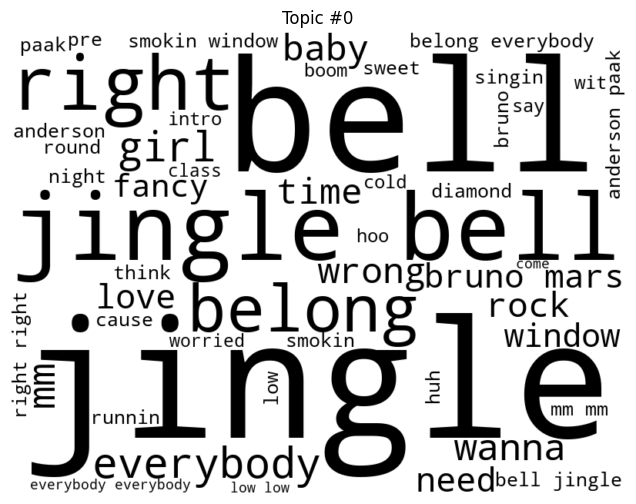

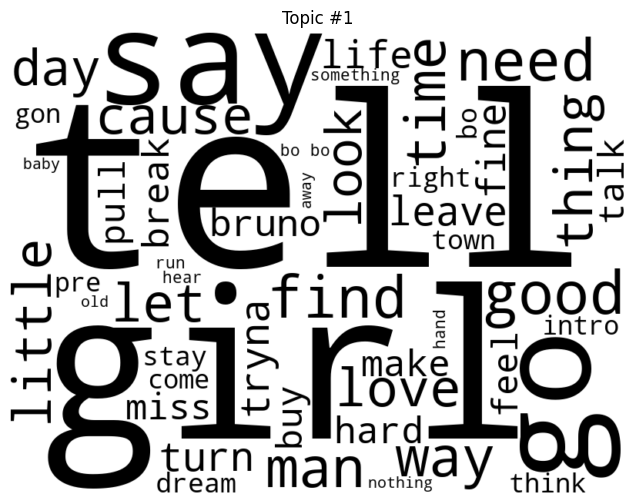

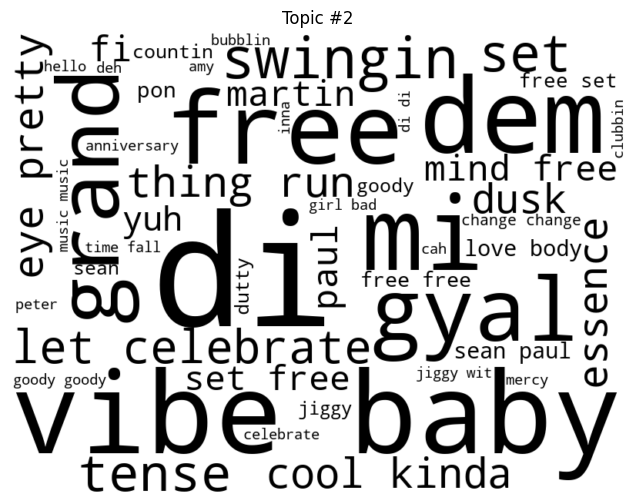

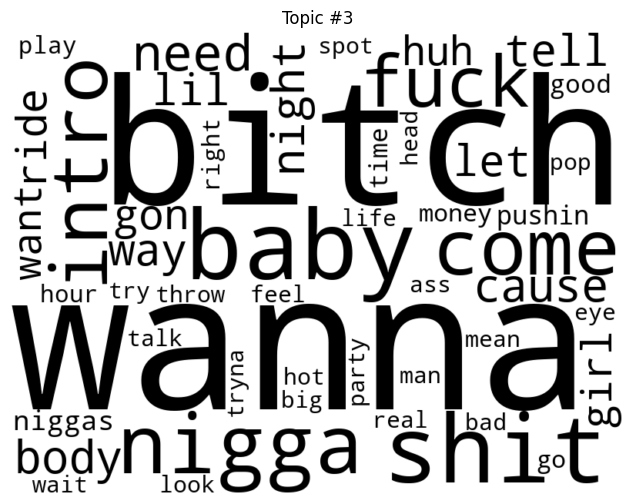

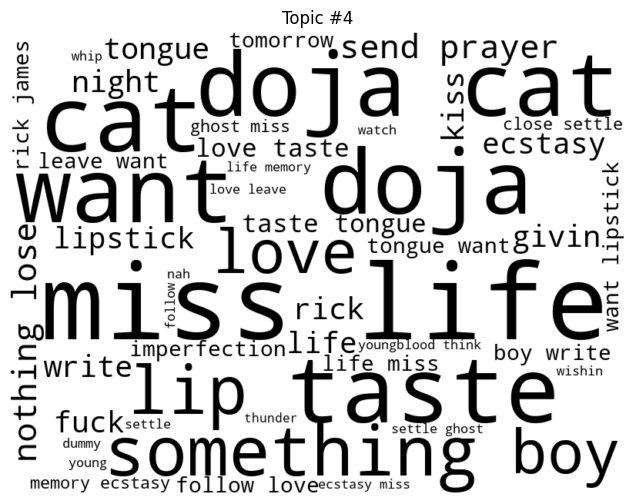

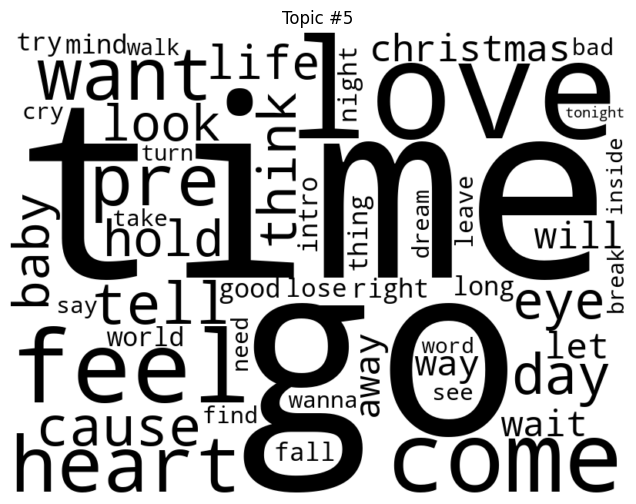

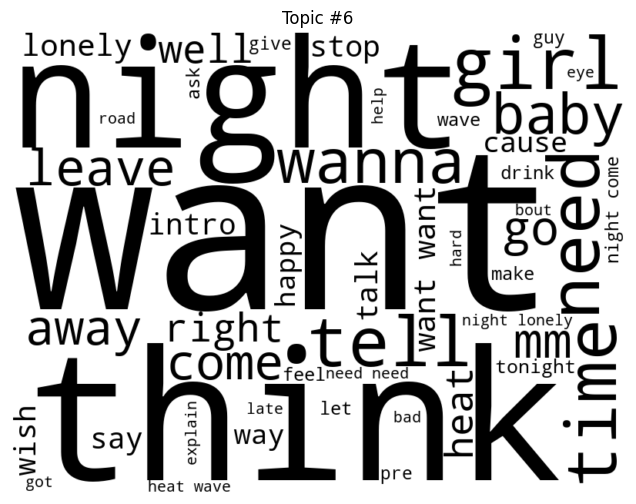

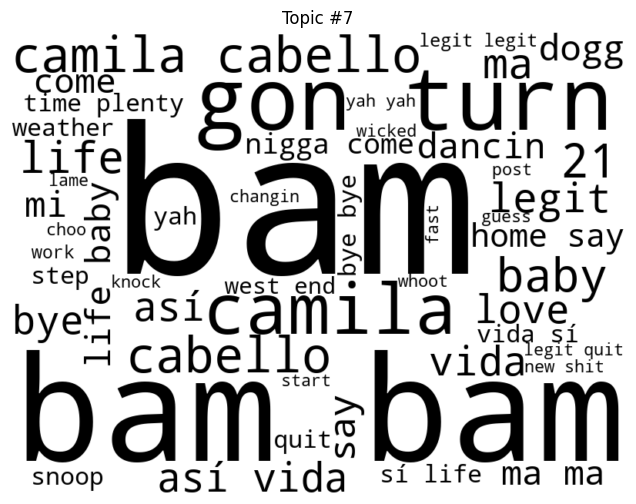

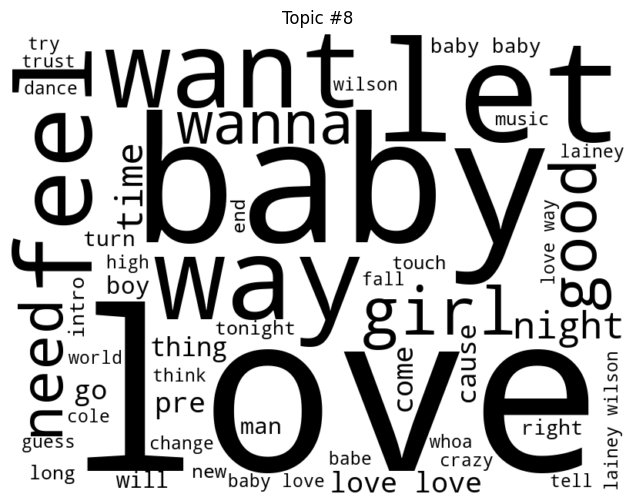

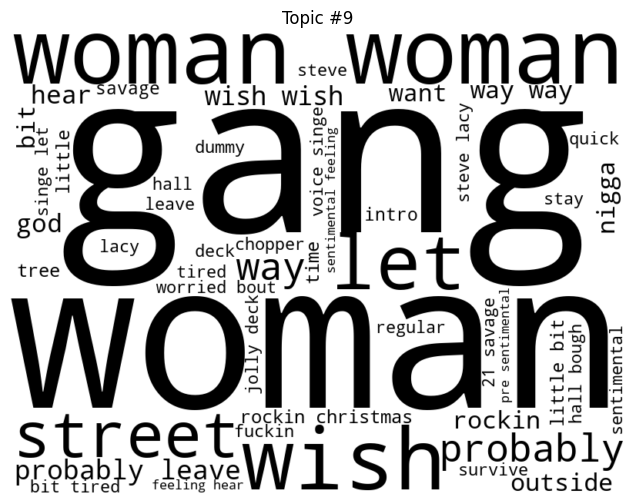

In [92]:
from wordcloud import WordCloud

def generate_wordclouds(topics, dictionary):
    for topic_num, topic_words in topics:
        word_freq = dict(topic_words)
        wordcloud = WordCloud(
            width = 800,
            height = 600,
            background_color ='white',
            color_func=lambda *args, **kwargs: "black", # Ensures words are in black
            min_font_size = 10).generate_from_frequencies(word_freq)
        
        plt.figure(figsize = (8, 6), facecolor = None)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f'Topic #{topic_num}')
        plt.show()

# Generate word clouds for each topic
generate_wordclouds(topics, lda_model.id2word)


### Trend for topic 1 and topic 0

In [99]:
# Assuming corpus_data is your existing DataFrame
# Ensure it has the same number of rows as the length of doc_topics

# Initialize the columns for each topic with default value 0
for topic_num in range(11):
    corpus_data[f'topic_{topic_num}'] = 0.0

# Iterate over the document topics to fill the DataFrame
for i, doc_distribution in enumerate(doc_topics):
    for topic_num, prob in doc_distribution:
        corpus_data.at[i, f'topic_{topic_num}'] = prob

# corpus_data now contains the topic distributions for each document

In [100]:
#Check this for whether topic shares correctly specified - should add to 1.

# Step 1: Calculate the sum of topic shares for each document
corpus_data['topic_sum'] = corpus_data[[f'topic_{i}' for i in range(10)]].sum(axis=1)

# Step 2: Create a test column that checks if the sum is close to 1
# We use numpy's isclose function to allow for a small margin of error in floating-point comparisons
import numpy as np
corpus_data['sum_is_1'] = np.isclose(corpus_data['topic_sum'], 1.0)

# Step 3: Produce summary statistics
# This gives you the count of True and False values in the 'sum_is_1' column
summary_stats = corpus_data['sum_is_1'].value_counts()

print(summary_stats)


sum_is_1
True    4102
Name: count, dtype: int64


In [101]:
import numpy as np
from IPython.display import HTML

# --- Specify the topic of interest ---
topic_of_interest = 0  # change this to whichever topic index you want
# Article to look at
row_index = 40

# 1) Gather probabilities for the topic_of_interest across the entire vocabulary

topic_probs_for_all_tokens = []
for token_id in range(len(dictionary)):
    topic_probs = lda_model.get_term_topics(token_id, minimum_probability=0)
    prob_for_topic = next((p for (t, p) in topic_probs if t == topic_of_interest), 0.0)
    topic_probs_for_all_tokens.append(prob_for_topic)

topic_probs_for_all_tokens = np.array(topic_probs_for_all_tokens)

# Compute global min and max
p_min = topic_probs_for_all_tokens.min()
p_max = topic_probs_for_all_tokens.max()

def scale_probability(prob, p_min, p_max):
    """Scale the probability to [0, 1] given the global min and max."""
    if p_max == p_min:
        # All probabilities are the same; return 0.5 or any constant for all tokens
        return 0.5
    return (prob - p_min) / (p_max - p_min)

def prob_to_grayscale(prob):
    """
    Convert a scaled probability (0 to 1) into a grayscale hex code.
    Higher probability => darker shade.
    """
    intensity = 255 - int(prob * 255)
    return f"#{intensity:02x}{intensity:02x}{intensity:02x}"

# 2) Process the text in a specific row (e.g., row 5) and display

text_example = corpus_data.loc[row_index, 'text_preproc']
tokens = text_example.split()

html_output = "<div style='font-family: Arial; line-height: 1.6em;'>"

for token in tokens:
    if token in dictionary.token2id:
        token_id = dictionary.token2id[token]
        topic_probs = lda_model.get_term_topics(token_id, minimum_probability=0)
        # Probability for the chosen topic
        raw_prob = next((p for (t, p) in topic_probs if t == topic_of_interest), 0.0)
        
        # Rescale based on global distribution
        scaled_prob = scale_probability(raw_prob, p_min, p_max)
        
        # Convert scaled probability to grayscale
        bg_color = prob_to_grayscale(scaled_prob)
    else:
        # If token isn't in the dictionary, show as light gray
        bg_color = "#eeeeee"
    
    html_output += f"<span style='background-color: {bg_color}; padding: 3px; margin: 2px;'>{token}</span> "

html_output += "</div>"

HTML(html_output)


### Agreggating Topic Shares

In [112]:
alpha_prior = lda_model.alpha
total_alpha_prior = sum(alpha_prior)  # This is useful for later calculations
print("Alpha prior:", alpha_prior)
print("Total alpha prior:", total_alpha_prior)


Alpha prior: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Total alpha prior: 1.0000000149011612


In [103]:
corpus_data

year  ranking                      title  \
0     1981        1           Bette Davis Eyes   
1     1981        2               Endless Love   
2     1981        3                       Lady   
3     1981        4  (Just Like) Starting Over   
4     1981        5              Jessie's Girl   
...    ...      ...                        ...   
4097  2022       96               Flower Shops   
4098  2022       97                To the Moon   
4099  2022       98                     Unholy   
4100  2022       99            One Mississippi   
4101  2022      100   Circles Around This Town   

                              artist  \
0                         Kim Carnes   
1         Diana Ross & Lionel Richie   
2                       Kenny Rogers   
3                        John Lennon   
4                   Rick Springfield   
...                              ...   
4097  Ernest featuring Morgan Wallen   
4098       Jnr Choi and Sam Tompkins   
4099        Sam Smith and Kim Petras   
4100                      Kane Brown   
4101                    Maren Morris   

                                                 lyrics  \
0     Her hair is Harlow gold Her lips sweet surpris...   
1     My love There's only you in my life The only t...   
2     Lady I'm your knight in shining armor And I lo...   
3     Our life together is so precious together We h...   
4     Jessie is a friend Yeah, I know, he's been a g...   
...                                                 ...   
4097  It's a beautiful day, she's been cryin' all ni...   
4098  Sit by myself Talking to the moon Teh, ha, pul...   
4099  Mummy don't know Daddy's getting hot At the Bo...   
4100  You and I Had this off and on so long You've b...   
4101  I swear I don't know how I trusted A Montero w...   

                                               song_url  \
0     https://genius.com/kim-carnes-bette-davis-eyes...   
1     https://genius.com/diana-ross-and-lionel-richi...   
2           https://genius.com/kenny-rogers-lady-lyrics   
3     https://genius.com/john-lennon-just-like-start...   
4     https://genius.com/rick-springfield-jessies-gi...   
...                                                 ...   
4097      https://genius.com/ernest-flower-shops-lyrics   
4098  https://genius.com/jnr-choi-and-sam-tompkins-t...   
4099  https://genius.com/sam-smith-and-kim-petras-un...   
4100  https://genius.com/kane-brown-one-mississippi-...   
4101  https://genius.com/maren-morris-circles-around...   

                                              producers  \
0                                         ['Val Garay']   
1                                     ['Lionel Richie']   
2                                     ['Lionel Richie']   
3           ['Yoko Ono', 'John Lennon', 'Jack Douglas']   
4                                       ['Keith Olsen']   
...                                                 ...   
4097                                       ['Joey Moi']   
4098                                      ['Parked Up']   
4099  ['Sam Smith', 'ILYA', 'Jimmy Napes', 'Blake Sl...   
4100                                      ['Dann Huff']   
4101                                   ['Greg Kurstin']   

                                                writers  \
0                   ['Jackie DeShannon', 'Donna Weiss']   
1                                     ['Lionel Richie']   
2                                     ['Lionel Richie']   
3                           ['Yoko Ono', 'John Lennon']   
4                                  ['Rick Springfield']   
...                                                 ...   
4097           ['ERNEST', 'Mark Holman', 'Ben Burgess']   
4098  ['Philip Lawrence', 'Bruno Mars', 'Jeff Bhaske...   
4099  ['Omer Fedi', 'ILYA', 'Jimmy Napes', 'Blake Sl...   
4100  ['Levon Gray', 'ERNEST', 'Jesse Frasure', 'Kan...   
4101  ['Jimmy Robbins', 'Julia Michaels', 'Maren Mor...   

                                         label         released_on  ...  \
0            

In [104]:
# Create a new column 'word_count' by counting the number of words in each preprocessed text
corpus_data["word_count"] = corpus_data["text_preproc"].apply(lambda x: len(x.split()))

# Drop rows where the word count is less than 10
corpus_data = corpus_data[corpus_data["word_count"] >= 10]

In [109]:
# For each topic column, calculate the words attributed to that topic
for i in range(11):
    corpus_data[f'words_topic_{i}'] = corpus_data[f'topic_{i}'] * corpus_data['word_count']


C:\Users\aleja\AppData\Local\Temp\ipykernel_30536\2250419978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_data[f'words_topic_{i}'] = corpus_data[f'topic_{i}'] * corpus_data['word_count']


In [113]:
# Assuming corpus_data has 'year' a
# Prepare the data for aggregation
aggregation_data = corpus_data[['year'] + [f'words_topic_{i}' for i in range(10)]]

# Group by year and sum the word counts for topics
grouped_data = aggregation_data.groupby(['year']).sum().reset_index()

#instead of changing the alphas I will just modify the weigth I give the prior in the aggregation
pweight=1
# Now adjust these sums by adding alpha_prior to each topic's word count
# and divide by the total words in each group plus total_alpha_prior
for i in range(10):
    grouped_data[f'topic_share_{i}'] = (grouped_data[f'words_topic_{i}'] + pweight*alpha_prior[i]) / (grouped_data[[f'words_topic_{j}' for j in range(10)]].sum(axis=1) + pweight*total_alpha_prior)

# Select only the year, month, and topic share columns for the final DataFrame
final_columns = ['year'] + [f'topic_share_{i}' for i in range(10)]
result_df = grouped_data[final_columns]


In [114]:
result_df.head()

year  topic_share_0  topic_share_1  topic_share_2  topic_share_3  \
0  1981       0.082943       0.160570       0.050497       0.077588   
1  1982       0.067849       0.148555       0.015705       0.062513   
2  1983       0.052635       0.181044       0.067383       0.047065   
3  1984       0.057106       0.210556       0.015963       0.078985   
4  1985       0.037737       0.151959       0.050974       0.107427   

   topic_share_4  topic_share_5  topic_share_6  topic_share_7  topic_share_8  \
0       0.063771       0.317764       0.060085       0.035380       0.118165   
1       0.053837       0.330536       0.100230       0.013364       0.179051   
2       0.070729       0.284495       0.113693       0.008457       0.138762   
3       0.018332       0.311218       0.086242       0.022037       0.167271   
4       0.035939       0.273744       0.102767       0.023167       0.188822   

   topic_share_9  
0       0.033236  
1       0.028360  
2       0.035738  
3       0.032291  
4       0.027465

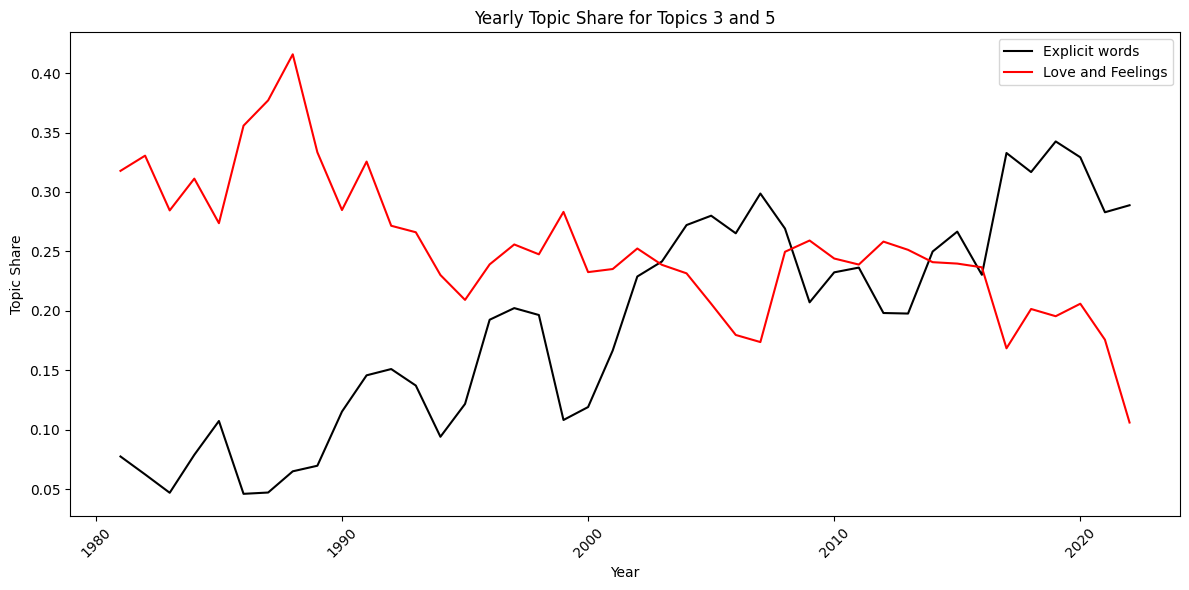

In [115]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot each topic share over time within the filtered range
plt.plot(result_df['year'], result_df['topic_share_3'], label='Explicit words', color='black')
plt.plot(result_df['year'], result_df['topic_share_5'], label='Love and Feelings', color='red')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Topic Share')
plt.title('Yearly Topic Share for Topics 3 and 5')

plt.legend()

# Show plot
plt.tight_layout()
plt.show()